In [ ]:
!unzip /content/Fuzzy_dataset.zip

Archive:  /content/Fuzzy_dataset.zip
  inflating: Fuzzy_dataset.csv       


In [ ]:
#Making graph
def prepareEdge(edge, source, destination):
    if (len(edge) == 0):
        edge.append((source, destination, 1));
    insertIndex = -1;
    for i in range(0, len(edge)):
        if (edge[i][0] == source and edge[i][1] == destination):
            insertIndex = i;
    if (insertIndex != -1):
        edge[insertIndex]=(edge[insertIndex][0], edge[insertIndex][1], edge[insertIndex][2]+1)
    else:
        edge.append((source, destination, 1))
    return edge


count = 1
file = open('Fuzzy_dataset.csv', 'r')
f= open("fuzzyOverView.txt","w+")
msgIDs = {};
edge = []
prev = ''
s = '';
attacked = 0;
for line in file:
    #print(line)
    #if(count == 1):
        #print(line.split()[0].split(','));
        #break;
    if (count%200 == 1):
        Xpartition = line.split()[0].split(',');
        prev = Xpartition[1]
    #if (count <= 1000):
        #count+=1;
        #continue;

    Xpartition = line.split()[0].split(',');
    if (Xpartition[1] in msgIDs.keys()):
        msgIDs[Xpartition[1]] += 1;
    else:
        msgIDs[Xpartition[1]] = 1;
    if (prev != '' and count != 1):
        temp = (prev, Xpartition[1], 1);
        #edge.append(temp);
        edge =prepareEdge(edge, prev, Xpartition[1])
        prev = Xpartition[1]
    #if(count == 2000):
        #print(count)
        #break;
    if (Xpartition[len(Xpartition)-1] == 'T'):
        attacked = count;
    if (count%200 == 0):
        s+= 'Graph No: ' + str(int(count/200)) + ':\r\n';
        # s+= 'Number of Edge ' + str(len(edge)) + '\r\n';
        # s+= 'Number of Node ' + str(len(msgIDs)) + '\r\n'
        if (count -200 < attacked and attacked <= count ):
            s+= 'Attack Free: ' 'False ' + str(attacked) + '\r\n';
        else:
            s+= 'Attack Free: ' 'True ' + str(attacked) + '\r\n';
        for key in msgIDs:
            s+= str(key) + ' --> ';
            for i in range(0, len(edge)):
                if(key == edge[i][0]):
                    s+= edge[i][1] + ' '
            s+= '\r\n'
        msgIDs = {};
        edge = [];
    count +=1

f.write(s)
f.close()

In [ ]:
#Getting all the features

import networkx as nx
import hashlib
import numpy as np


gAttacked = nx.DiGraph()
gAttackfree = nx.DiGraph()

#Function for tracing the attacked and attackfree graph. Return a list which 
#contation the info that a graph is attacked or attack
def getAttackFreelist(filename):
  attacFreekList = []
  file_ = open(filename, 'r')


  graphCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
    

    
      graph_number = line[0:5]
    
      if graph_number == "Graph":
      #print(graph_number+str(graphCounter))
        graphCounter += 1
        line = file_.readline()
        attacFreekList.append(line.split())

  
  file_.close()
  print(len(attacFreekList))
  print(attacFreekList)
  return attacFreekList


def getFeatures(filename):

  attackFreeList = getAttackFreelist(filename)
  file_ = open(filename, 'r')

  graphList = []
  ultimate_graphList = []  
  graphCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
    

    
      graph_number = line[0:5]
    
      if graph_number == "Graph":
      #print(graph_number+str(graphCounter))
        graphCounter += 1
        line = file_.readline()
        line = file_.readline()

        if graphCounter >= 2:
          ultimate_graphList.append(graphList)
          graphList = []


    
      list1 = line.split()
      graphList.append(list1)



  ultimate_graphList.append(graphList)
    
  file_.close()

  list_All_Feature_Set = []
 
  filetowrite = filename[:-4]+"_GraphFeatures.txt"
  file1 = open(filetowrite,'w')

  graphNumber = len(ultimate_graphList)
 
# Iterating every graph
 
  for i in range(0,graphNumber):

    G = nx.DiGraph()
    
    graphEdgeNumber = len(ultimate_graphList[i])
     # defining variable for detecting max pagerank
  #making the graph
  
    
    for j in range(0,graphEdgeNumber):
      vertexConnectionLength = len(ultimate_graphList[i][j])

      for k in range(2,vertexConnectionLength):
      
      
        G.add_edge(ultimate_graphList[i][j][0],ultimate_graphList[i][j][k])
        if i == 3:
          gAttackfree.add_edge(ultimate_graphList[i][j][0],ultimate_graphList[i][j][k])
          #print(list(gAttackfree))
        if i == 7: 
          gAttacked.add_edge(ultimate_graphList[i][j][0],ultimate_graphList[i][j][k])
    

    weighted_Feature_Set = nx.pagerank(G)
    
    edge = G.number_of_edges()
    node = G.number_of_nodes()

    
    temp_list = list(weighted_Feature_Set.values())
    median_pagerank_vertices = np.median(temp_list)
    maximum_pagerank_vertex = np.max(temp_list)
    minimum_pagerank_vertex = np.min(temp_list)
    std_pagerank = np.std(temp_list)
    varpagerank = np.var(temp_list)




    if i == 0:
      file1.write("No."+"\t"+"Nodes\t"+"Edges\t"+"MaximumIndegree\t"+"MinimumIndegree\t"+"MaximumOutdegree\t"+
                  "MinimumOutdegree\t"+	
                  "MedianPagerank\t"+"MaximumPagerank\t"+"MininumPagerank\t"+"StdPageRank\t"+
                  "VarPageRank\t"+"State\n")

    file1.write(str(i+1)+"\t")
    counter = 0
    in_deg = []
    out_deg = []
    for key,val in weighted_Feature_Set.items():
      in_deg.append(G.in_degree(key))
      out_deg.append(G.out_degree(key))
    
    maxInd = np.max(in_deg)
    minInd = np.min(in_deg)
    maxOut = np.max(out_deg)
    minOut = np.min(out_deg)
    file1.write(str(node)+"\t") 
    file1.write(str(edge)+"\t")
    file1.write(str(maxInd)+str("\t")+str(minInd)+str("\t"))
    file1.write(str(maxOut)+str("\t")+str(minOut)+str("\t"))
    
    file1.write(str(median_pagerank_vertices)+str("\t")+str(maximum_pagerank_vertex))
    file1.write(str("\t")+str(minimum_pagerank_vertex)+str("\t")+str(std_pagerank)+"\t"+
                str(varpagerank)+"\t"+
                str(attackFreeList[i][2])+"\n")

  


  file1.close()
getFeatures('/content/fuzzyOverView.txt')



19194
[['Attack', 'Free:', 'True', '0'], ['Attack', 'Free:', 'True', '0'], ['Attack', 'Free:', 'True', '0'], ['Attack', 'Free:', 'True', '0'], ['Attack', 'Free:', 'True', '0'], ['Attack', 'Free:', 'True', '0'], ['Attack', 'Free:', 'True', '0'], ['Attack', 'Free:', 'False', '1596'], ['Attack', 'Free:', 'False', '1800'], ['Attack', 'Free:', 'False', '2000'], ['Attack', 'Free:', 'False', '2199'], ['Attack', 'Free:', 'False', '2400'], ['Attack', 'Free:', 'False', '2600'], ['Attack', 'Free:', 'False', '2798'], ['Attack', 'Free:', 'False', '2999'], ['Attack', 'Free:', 'False', '3181'], ['Attack', 'Free:', 'True', '3181'], ['Attack', 'Free:', 'True', '3181'], ['Attack', 'Free:', 'True', '3181'], ['Attack', 'Free:', 'True', '3181'], ['Attack', 'Free:', 'True', '3181'], ['Attack', 'Free:', 'True', '3181'], ['Attack', 'Free:', 'True', '3181'], ['Attack', 'Free:', 'True', '3181'], ['Attack', 'Free:', 'True', '3181'], ['Attack', 'Free:', 'True', '3181'], ['Attack', 'Free:', 'True', '3181'], ['Atta

In [ ]:
print(list(gAttackfree))

['0350', '0130', '02c0', '0131', '0140', '0370', '0440', '043f', '0690', '04f0', '0316', '018f', '0260', '02a0', '0329', '0545', '02b0', '05f0', '0002', '0430', '0153', '00a0', '04b1', '01f1', '00a1']


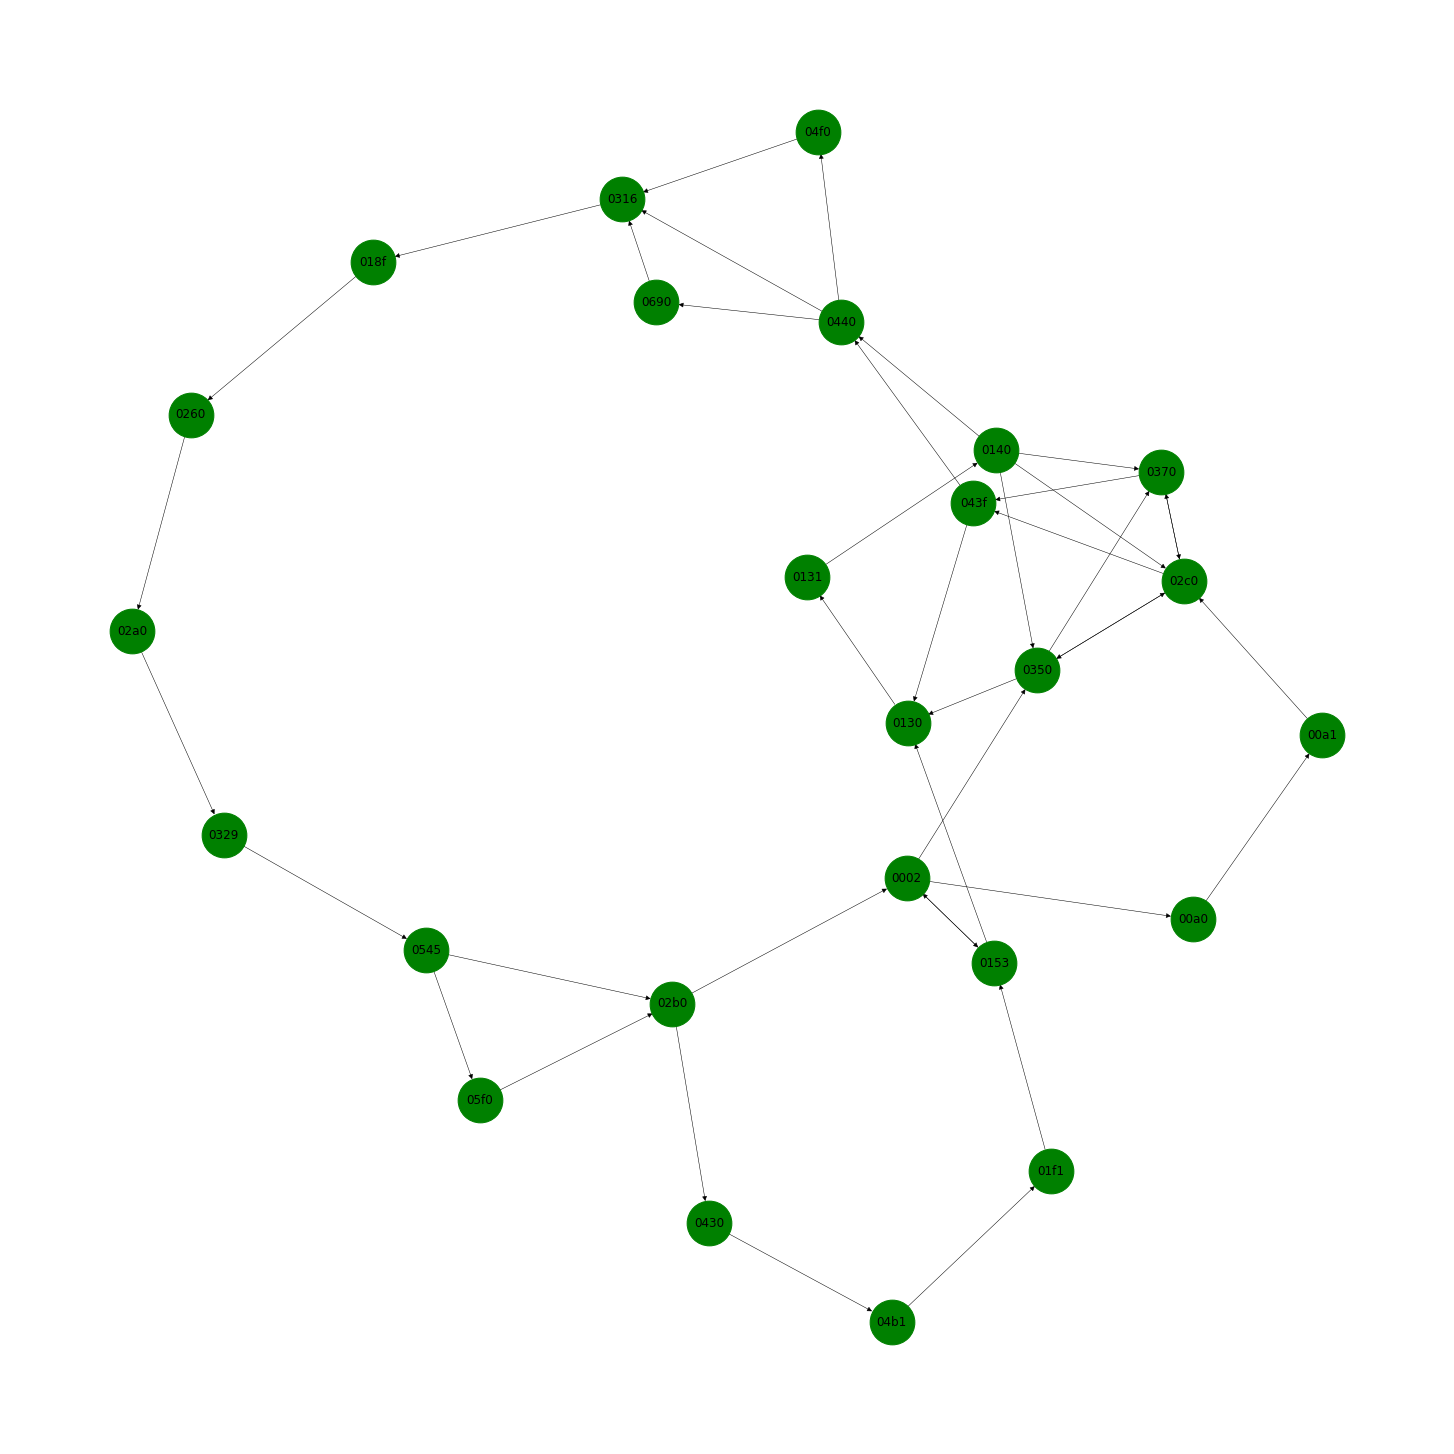

In [ ]:
#Visualizing the attack free Graph

plt.figure(figsize=(20,20))

pos = nx.nx_pydot.graphviz_layout(gAttackfree)
nx.draw(gAttackfree, pos, node_size = 2000, with_labels= True, width = .5, node_color='Green')
plt.savefig("graphAttackfree.png", bbox_inches = "tight")
#plt.savefig("graphAttackfree.pdf", bbox_inches = "tight")
#plt.savefig("graphAttackfree.svg", bbox_inches = "tight")

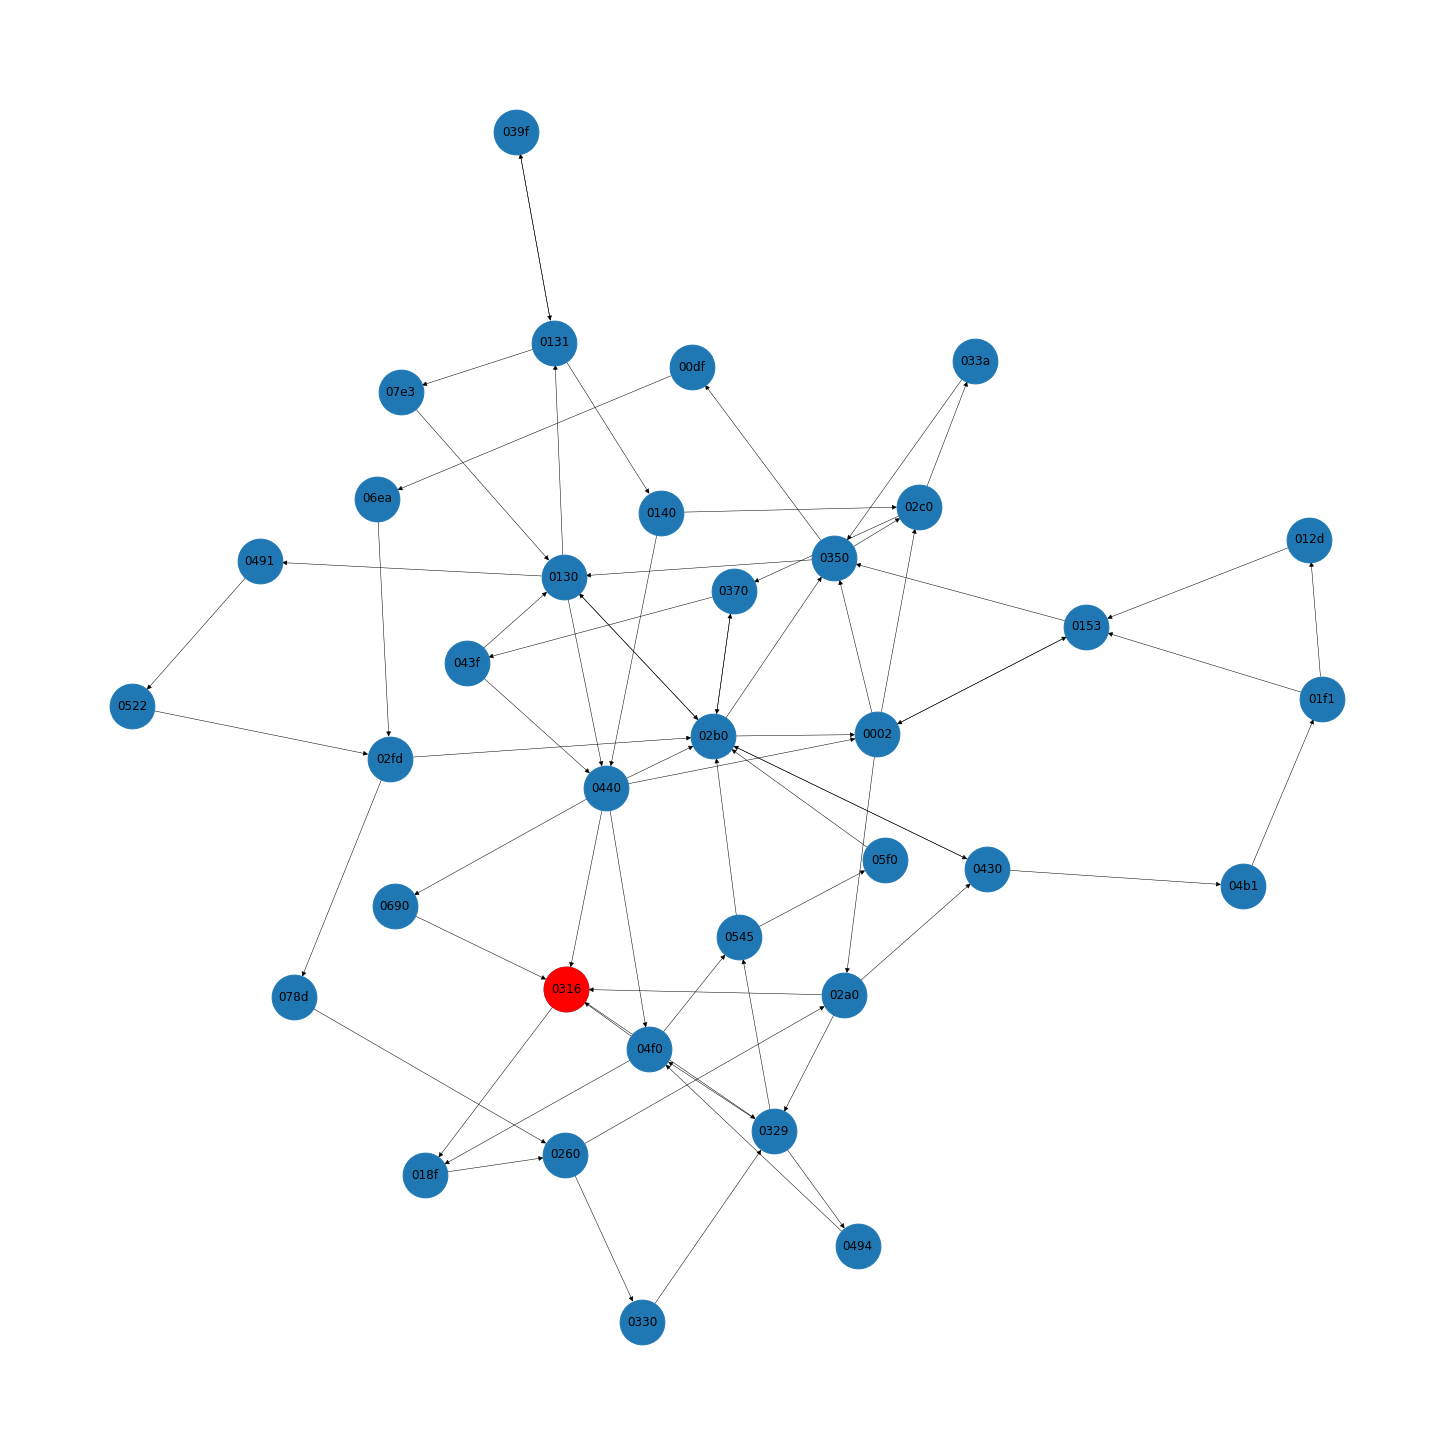

In [ ]:
#Visualizing the attacked Graph
ndlist = ['0316']
plt.figure(figsize=(20,20))
pos = nx.nx_pydot.graphviz_layout(gAttacked)
nx.draw(gAttacked, pos, node_size = 2000, with_labels= True, width = .5)
nx.draw_networkx_nodes(gAttacked, pos, node_size=2000, nodelist=ndlist, node_color='red')
plt.savefig("graphAttacked.png", bbox_inches = "tight")
#plt.savefig("graphAttacked.pdf", bbox_inches = "tight")
#plt.savefig("graphAttacked.svg", bbox_inches = "tight")

In [ ]:
#Applying the GNB and getting the accuracy and confusion matrix

import seaborn as sn
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# load dataset
dataframe = pandas.read_table('/content/fuzzyOverView_GraphFeatures.txt')
data = dataframe.drop("No.", axis=1)
data = data.drop("StdPageRank", axis=1)
data = data.drop("VarPageRank", axis=1)
dataset = data.values



# split into input (X) and output (Y) variables


l = 19194
X = dataset[:,0:]
# print(X.shape)
labels = []
for i in range (0,l):
  if X[i][9] == True:
    labels.append(0)
  else:
    labels.append(1)

features = X[0:l,0:9]




# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                            labels,
                                                            test_size=0.33,
                                                            random_state= 42)#

  # Initialize our classifier
gnb = GaussianNB()

  # Train our classifier
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)

print("Attackfreee")
print(test_labels.count(0))
print("Attacked")
print(test_labels.count(1))
  
  # Evaluate accurac
print(accuracy_score(test_labels, preds))

cm = confusion_matrix(test_labels, preds)

cm = cm.T

print(cm)



Attackfreee
4096
Attacked
2239
0.9973164956590371
[[4092   13]
 [   4 2226]]


[ 2.24693931e-01  2.12659547e-01 -2.08387601e-04  0.00000000e+00
 -1.56290701e-04  8.06980985e-02  5.26178692e-02 -1.56290701e-04
 -3.12581401e-04]


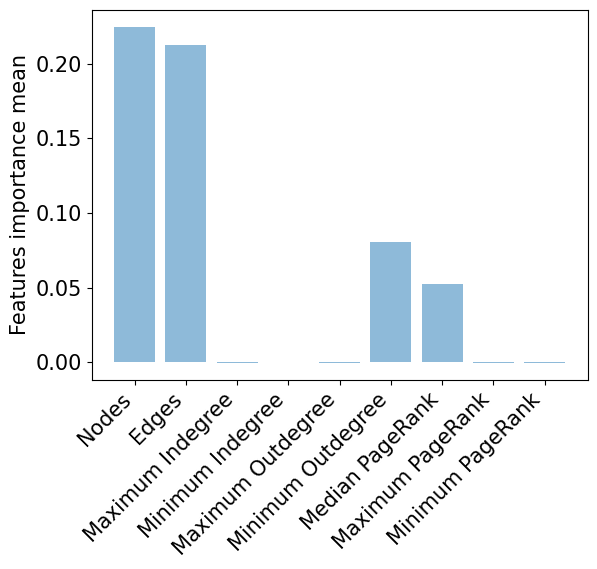

In [ ]:
#Getting the feature importacne
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

imps = permutation_importance(gaussian_nb, X_test, y_test)
print(imps.importances_mean)
an = ["Nodes","Edges","Maximum Indegree","Minimum Indegree","Maximum Outdegree","Minimum Outdegree", "Median PageRank",
      "Maximum PageRank","Minimum PageRank"]
plt.bar(an, np.array(imps.importances_mean), width = .8, align='center', alpha=0.5)
plt.xticks(rotation=45, ha ='right', fontsize = 15)
plt.ylabel('Features importance mean', fontsize = 15)
plt.tick_params(labelsize=15)
plt.savefig('feature_importance.PNG', bbox_inches = "tight")
#plt.savefig('feature_importance.svg', bbox_inches = "tight")
#plt.savefig('feature_importance.pdf', bbox_inches = "tight")


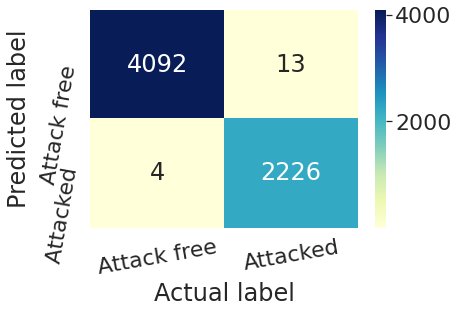

In [ ]:
#Getting the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
from pylab import savefig
import matplotlib.pyplot as plt
%matplotlib inline




cm_matrix = pd.DataFrame(data=cm, columns=['Attack free', 'Attacked'], 
                                 index=['   Attack free ', ' Attacked'])
sns.set(font_scale=2)
sns.heatmap(cm_matrix, annot=True, fmt= 'd', cmap='YlGnBu')
# plt.title("Confusion Matrix for All attack")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.yticks(rotation = 80)
plt.xticks(rotation = 10)
plt.rcParams['font.size'] = 4
plt.rcParams['figure.figsize'] = (1, 1)   
plt.savefig('confusion_.pdf', bbox_inches = "tight")
# plt.savefig('confusion_.PNG', bbox_inches = "tight")
# plt.savefig('confusion_.svg', bbox_inches = "tight")

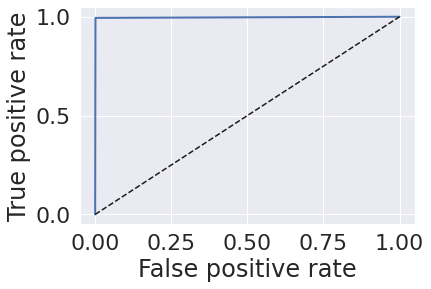

In [ ]:
#ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_labels, preds)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 10

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

plt.savefig('roc_curve.pdf', bbox_inches = "tight")
# plt.savefig('roc_curve.PNG', bbox_inches = "tight")
# plt.savefig('roc_curve.svg', bbox_inches = "tight")

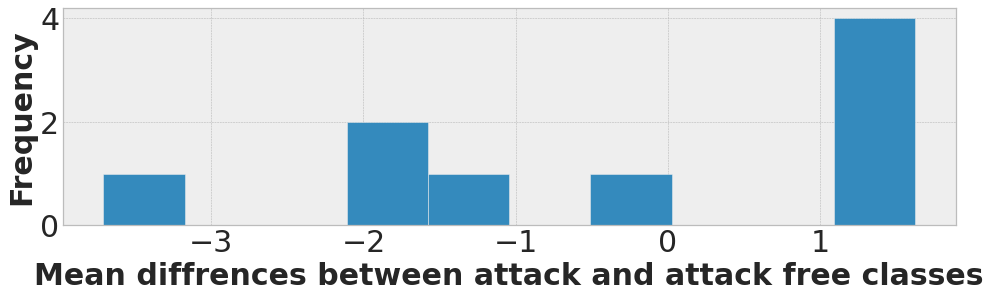

In [ ]:
#Mean difference between attack and attackfree

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(16,4))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['State'].values

transformed = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(X_train))


#print(transformed[y_train == True].mean() - transformed[y_train == False].mean())
plt.hist(transformed[y_train == False].mean() - transformed[y_train == True].mean())

plt.ylabel('Frequency', fontsize = 30, fontweight = 'bold')
plt.xlabel('Mean diffrences between attack and attack free classes', fontsize = 30, fontweight = 'bold')
plt.tick_params(labelsize=30)
# plt.title('Histogram of sample mean differences between two classes', **title_config)
plt.savefig("mean_difference.png", bbox_inches = "tight")
# plt.savefig("mean_difference.svg", bbox_inches = "tight")
# plt.savefig("mean_difference.pdf", bbox_inches = "tight")

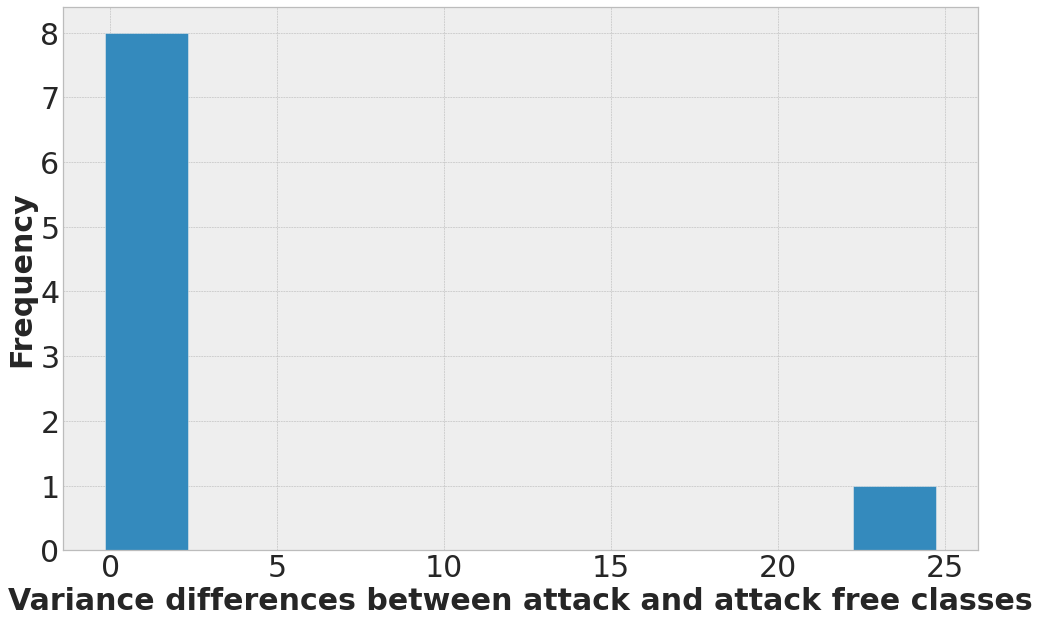

In [ ]:
#Variance difference between attack free and attack
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(16.4,10))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['State'].values

plt.hist(transformed[y_train == False].var() - transformed[y_train == True].var())

plt.xlabel('Variance differences between attack and attack free classes', fontsize = 30, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 30, fontweight = 'bold')
plt.tick_params(labelsize=30)
plt.savefig("variance_diference.png", bbox_inches = "tight")
# plt.savefig("variance_diference.svg", bbox_inches = "tight")
# plt.savefig("variance_diference.pdf", bbox_inches = "tight")

6
4


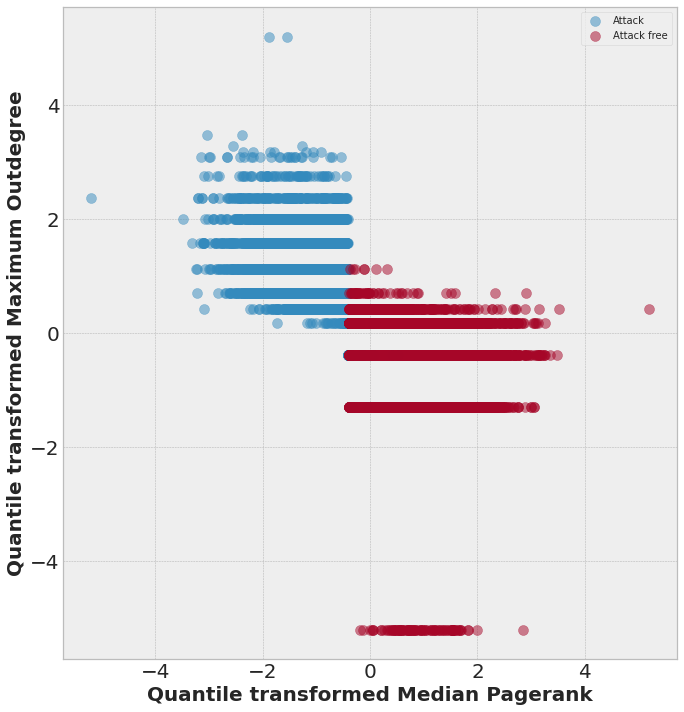

In [ ]:
#Least variance features plotting using transformed features
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(11,12))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['State'].values
select = (transformed[y_train == False].var() - transformed[y_train == True].var()).nsmallest(2).index

print(select[0])
print(select[1])

plt.scatter(transformed.loc[y_train == False, select[0]], transformed.loc[y_train == False, select[1]], alpha=0.5, label='Attack', s = 100)
plt.scatter(transformed.loc[y_train == True, select[0]], transformed.loc[y_train == True, select[1]], alpha=0.5, label='Attack free', s = 100)
plt.ylabel("Quantile transformed Maximum Outdegree", fontsize = 20, fontweight = 'bold')
plt.xlabel("Quantile transformed Median Pagerank", fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize=20)
plt.legend(fontsize = 10)

plt.savefig("higherSampleVariance.png", bbox_inches = "tight")
# plt.savefig("higherSampleVariance.pdf", bbox_inches = "tight")
# plt.savefig("higherSampleVariance.svg", bbox_inches = "tight")

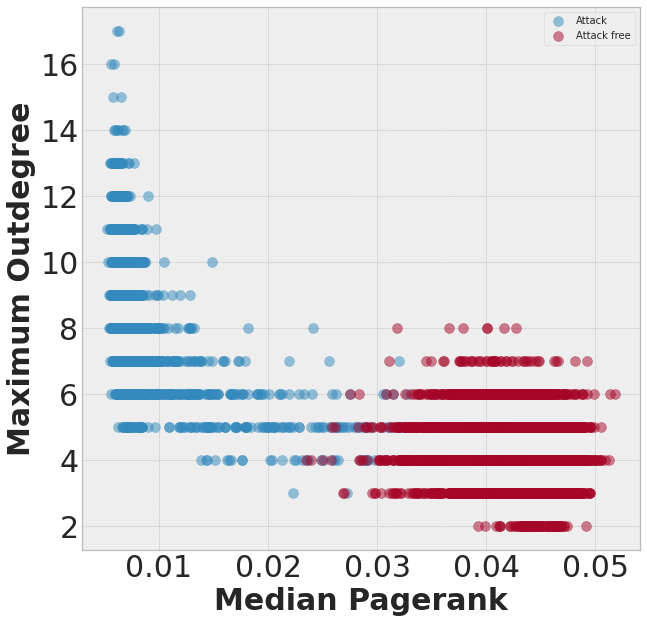

In [ ]:
#Least variance features plotting using orginal features
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(10,10))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['State'].values



plt.scatter(X_train[y_train == False, select[0]], X_train[y_train == False, select[1]], alpha=0.5, label='Attack', s= 100)
plt.scatter(X_train[y_train == True, select[0]], X_train[y_train == True, select[1]], alpha=0.5, label='Attack free', s= 100)
plt.xlabel(str(data.columns[select[0]]))
plt.ylabel(str(data.columns[select[1]]))
#plt.title('Bounds in Data', **title_config)
plt.xlabel("Median Pagerank", fontsize = 30, fontweight = 'bold')
plt.ylabel("Maximum Outdegree", fontsize = 30, fontweight = 'bold')
plt.tick_params(labelsize=30)
plt.legend(fontsize = 10);
plt.savefig("bounds_in_data.png", bbox_inches = "tight")
# plt.savefig("bounds_in_data.svg", bbox_inches = "tight")
# plt.savefig("bounds_in_data.pdf", bbox_inches = "tight")

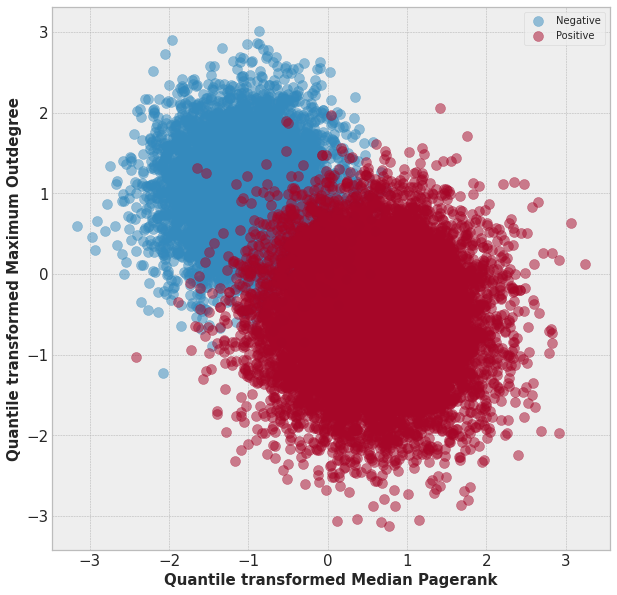

In [ ]:
#Gaussian distribution plotting
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(10,10))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['State'].values

size0 = (y_train == False).sum()
size1 = y_train.size - size0

x0 = np.random.normal(transformed.loc[y_train == False, select[0]].mean(),
                      transformed.loc[y_train == False, select[0]].std(), size=size0)

y0 = np.random.normal(transformed.loc[y_train == False, select[1]].mean(),
                      transformed.loc[y_train == False, select[1]].std(), size=size0)
x1 = np.random.normal(transformed.loc[y_train == True, select[0]].mean(),
                      transformed.loc[y_train == True, select[0]].std(), size=size1)

y1 = np.random.normal(transformed.loc[y_train == True, select[1]].mean(),
                      transformed.loc[y_train == True, select[1]].std(), size=size1)

plt.scatter(x0, y0, alpha=0.5, label='Negative', s= 100)
plt.scatter(x1, y1, alpha=0.5, label='Positive', s= 100)

plt.xlabel("Quantile transformed Median Pagerank", fontsize = 15, fontweight = 'bold')
plt.ylabel("Quantile transformed Maximum Outdegree", fontsize = 15, fontweight = 'bold')
plt.tick_params(labelsize=15)

plt.legend(fontsize = 10)
plt.savefig("simulated_data.png", bbox_inches = "tight")
# plt.savefig("simulated_data.pdf", bbox_inches = "tight")
# plt.savefig("simulated_data.svg", bbox_inches = "tight")